# Procedural Generation Algorithms
Author: Jin Yeom (jinyeom@utexas.edu)

## Contents
- [Perlin noise](#Perlin-noise)

In [1]:
import math

import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
%matplotlib inline

## Perlin noise

From [Wikipedia](https://en.wikipedia.org/wiki/Perlin_noise),
> Perlin noise is most commonly implemented as a two-, three- or four-dimensional function, but can be defined for any 
> number of dimensions. An implementation typically involves three steps: grid definition with random gradient vectors,
> computation of the dot product between the distance-gradient vectors and interpolation between these values. 

In [3]:
def lerp(x, y, w):
    assert 0.0 <= w <= 1.0
    return w * x + (1.0 - w) * y

In [4]:
def dist_grad_dot(grads, ix, iy, x, y):
    dx, dy = x - ix, y - iy
    return dx * grads[iy][ix][0] + dy * grads[iy][ix][1]

In [24]:
def perlin_noise(xmax, ymax):
    grads = np.random.normal(size=(ymax, xmax, 2))
    
    def perlin_at(x, y):
        x0, y0 = math.floor(x), math.floor(y)
        x1, y1 = x0 + 1, y0 + 1

        sx, sy = x - x0, y - y0
        
        n0 = dist_grad_dot(grads, x0, y0, x, y)
        n1 = dist_grad_dot(grads, x1, y0, x, y)
        ix0 = lerp(n0, n1, sx)
        
        n0 = dist_grad_dot(grads, x0, y1, x, y)
        n1 = dist_grad_dot(grads, x1, y1, x, y)
        ix1 = lerp(n0, n1, sx)
        
        return lerp(ix0, ix1, sy)
        
    return perlin_at

In [25]:
perlin_at = perlin_noise(1000, 1000)

In [26]:
n = []
for y in tqdm(np.arange(0, 500)):
    r = []
    for x in np.arange(0, 500):
        r.append(perlin_at(x, y))
    n.append(r)
n = np.array(n)

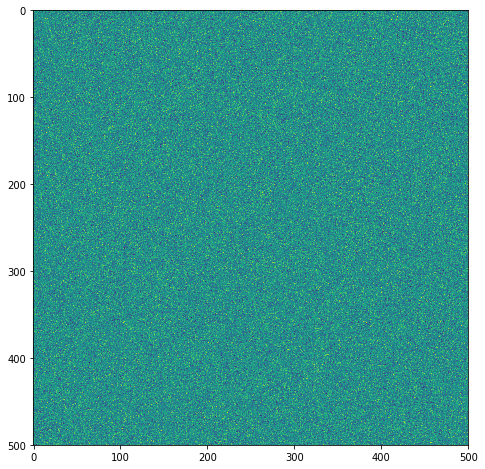

In [27]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(n)